# 2440016804 - Rio Pramana - LA01 - Final Exam - Nomor 3

#### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "experiment.csv"
experiment_df = pd.read_csv(csv_path)

#### Run a quick check on the dataset

In [3]:
experiment_df.shape

(4080, 201)

In [4]:
experiment_df.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.0,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.0,0.006711,0.0,1
1,0.000000,0.0,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.0,0.007246,0.0,1
2,0.011696,0.0,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.0,0.000000,0.0,1


In [5]:
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Columns: 201 entries, F1 to Class
dtypes: float64(200), int64(1)
memory usage: 6.3 MB


#### Check for missing data

In [6]:
def plot_nas(df: pd.DataFrame):
    #If there is a missing data, it will be visualized
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    #Else, nothing will be shown
    else:
        print('No NAs found')
        
#Check missing data in experiment_df
plot_nas(experiment_df)

No NAs found


There is no missing data

### Visualize value of Class

In [7]:
experiment_df['Class'].value_counts()

1    816
2    816
3    816
4    816
5    816
Name: Class, dtype: int64

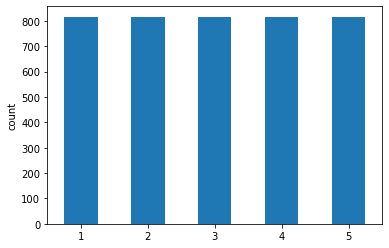

In [8]:
experiment_df['Class'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

Based on the graph above, we can see that there are 5 (five) unique values in Class variable. They are evenly distributed with 816 data each

__Before I do data visualization (1a.), it is best to preprocess the data first (1b.), especially to reduce the features so the data visualization can be more meaningful__

## Data Preprocessing

### Feature Scaling

In [9]:
experiment_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.007245,0.005094,0.003749,0.004814,0.004394,0.004664,0.004318,0.009327,0.004394,0.003458,...,0.004131,0.003731,0.004545,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,3.000000
std,0.012460,0.008867,0.008527,0.008642,0.008072,0.009278,0.007984,0.013402,0.009775,0.007367,...,0.009224,0.007468,0.008130,0.009218,0.008929,0.007681,0.007581,0.007857,0.008777,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.012500,0.009901,0.000000,0.009009,0.008282,0.007874,0.008000,0.016393,0.000000,0.000000,...,0.006944,0.000000,0.008621,0.008942,0.007143,0.005723,0.006499,0.006909,0.005579,4.000000
max,0.136364,0.076923,0.150000,0.100000,0.058824,0.103448,0.071429,0.094595,0.136364,0.142857,...,0.250000,0.071429,0.064516,0.120000,0.058824,0.125000,0.075000,0.050000,0.064103,5.000000


In [10]:
pd.set_option('display.max_rows', None)
#Confirm deduction of scale range by printing min and max value of all columns
print("Min:")
print(experiment_df.min())
print("\nMax:")
print(experiment_df.max())

Min:
F1       0.0
F2       0.0
F3       0.0
F4       0.0
F5       0.0
F6       0.0
F7       0.0
F8       0.0
F9       0.0
F10      0.0
F11      0.0
F12      0.0
F13      0.0
F14      0.0
F15      0.0
F16      0.0
F17      0.0
F18      0.0
F19      0.0
F20      0.0
F21      0.0
F22      0.0
F23      0.0
F24      0.0
F25      0.0
F26      0.0
F27      0.0
F28      0.0
F29      0.0
F30      0.0
F31      0.0
F32      0.0
F33      0.0
F34      0.0
F35      0.0
F36      0.0
F37      0.0
F38      0.0
F39      0.0
F40      0.0
F41      0.0
F42      0.0
F43      0.0
F44      0.0
F45      0.0
F46      0.0
F47      0.0
F48      0.0
F49      0.0
F50      0.0
F51      0.0
F52      0.0
F53      0.0
F54      0.0
F55      0.0
F56      0.0
F57      0.0
F58      0.0
F59      0.0
F60      0.0
F61      0.0
F62      0.0
F63      0.0
F64      0.0
F65      0.0
F66      0.0
F67      0.0
F68      0.0
F69      0.0
F70      0.0
F71      0.0
F72      0.0
F73      0.0
F74      0.0
F75      0.0
F76      0.0
F77    

From the data summarization above, it seems like every attribute in is in the same scale ranging from 0 to 1. Therefore, I decide not to do feature scaling (normalization/standardization) anymore because it is not needed

### Features Selection/Dimensional Reduction

From the dataset we can clearly see that we need to reduce the number of features used for machine learning models. This dataset contains 200 features and it is too much for a classification problem in this case. It will also slow down the algorithm.
Features selection in this case can:
1. Improve the accuracy of the model
2. Reduce overfitting
3. Faster training time
4. Reduce the complexity of the model

So, I will do features selection

I will use SelectKBest from sklearn to apply feature selection as it does not require us to select the model first, unlike other method such as feature importance

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Extracting independent variables:
X = experiment_df.iloc[:,:-1] #Extract every column except the last one
#Extracting dependent variable:
y = experiment_df.iloc[:,200] #Extract the last column

#Apply SelectKBest class to extract the 5 best features
best_features = SelectKBest(score_func = chi2, k = 5)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#Concat the two dataframes for better visualization 
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features','Score']

#Display the top 5 features
print(feature_scores.nlargest(5,'Score'))

    Features      Score
121     F122  28.603629
185     F186  20.326468
68       F69  19.691166
131     F132  19.253512
162     F163  18.659337


As seen above, the 5 best/most important features are F122, F186, F69, F132, and F163

In [12]:
#Creating new dataframe with the 5 best features + target variable
experiment_df_selected = experiment_df[['F122', 'F186', 'F69', 'F132', 'F163', 'Class']].copy()
experiment_df_selected.head(3)

,F122,F186,F69,F132,F163,Class
0,0.000000,0.0,0.000000,0.000000,0.020134,1
1,0.014493,0.0,0.036232,0.000000,0.007246,1
2,0.000000,0.0,0.005848,0.005848,0.029240,1


In [13]:
experiment_df_selected.shape

(4080, 6)

### Outlier Detection

From the data summarization in the previous step, we can see that each column has a min value of 0. Also, the max value of any column in the dataset is 1. It can be argued that there are no outlier in the dataset as every data in the dataset has a value ranging from 0 to 1.

But we still have to make sure that there are 100% no outlier in the dataset. Therefore, I will still do outlier detection

In this case, I will use One-Class SVM to detect and remove outlier as it is a good method for dataset with many features. Outlier detection will be applied to training set, not test set as to avoid data leakage

For outlier detection, we have to split the dataset into training set and test set first (using the new dataframe)

#### Splitting Dataset

In [14]:
#Extracting independent variables:
X = experiment_df_selected.iloc[:,:-1].values #Extract every column except the last one
#Extracting dependent variable:
y = experiment_df_selected.iloc[:,5].values #Extract the last column

I decided to split the dataset into 2:1 ratio (67% training set, 33% test set) because the dataset contains a good amount of data (4080 data)

In [15]:
#Import library scikit-learn
from sklearn.model_selection import train_test_split
#Split dataset with 33% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
#Print shape of each set
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2733, 5) (2733,)
Test set:  (1347, 5) (1347,)


In [16]:
#Outlier detection & removal
from sklearn.svm import OneClassSVM
print("Train set before outlier detection & removal: ", X_train.shape, y_train.shape)
# identify outliers in the training dataset
OCS = OneClassSVM(nu=0.01)
yhat = OCS.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#We only remove outliers from training set to avoid data leakage
X_train, y_train = X_train[mask, :], y_train[mask]

Train set before outlier detection & removal:  (2733, 5) (2733,)


In [17]:
print("Train set after outlier detection & removal: ", X_train.shape, y_train.shape)

Train set after outlier detection & removal:  (2357, 5) (2357,)


## Data Visualization

### Visualizing independent variable

In [18]:
#Set style ggplot
style.use('ggplot')

#### Visualizing independent variables' distribution

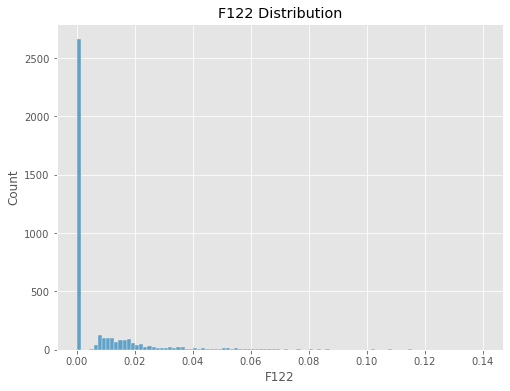

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'F122', data = experiment_df_selected)
plt.title('F122 Distribution')
plt.show()

As we can see from the graph above, F122 is heavily skewed with its values trending towards 0.00 (Over 2500 of its values are 0.00)

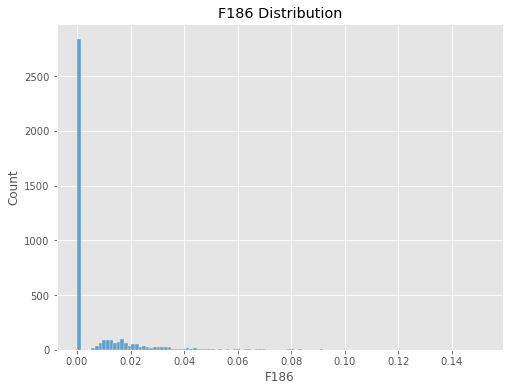

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'F186', data = experiment_df_selected)
plt.title('F186 Distribution')
plt.show()

F186 distribution is the same as F122 distribution

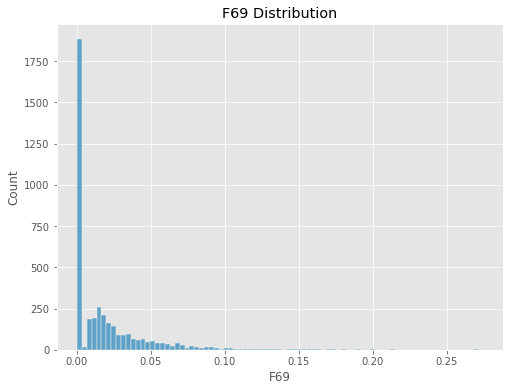

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'F69', data = experiment_df_selected)
plt.title('F69 Distribution')
plt.show()

F69 distribution is also the same as F122, but this time there are only slightly over 1750 data with value = 0.00

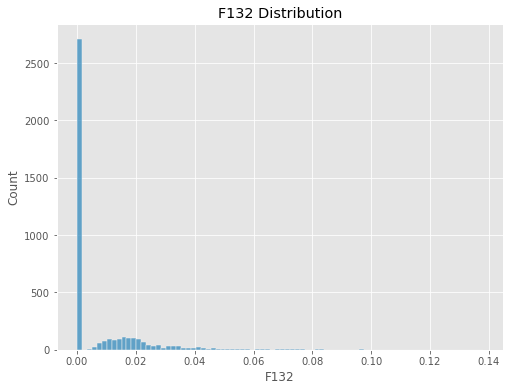

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'F132', data = experiment_df_selected)
plt.title('F132 Distribution')
plt.show()

F132 distribution is the same as F122 distribution

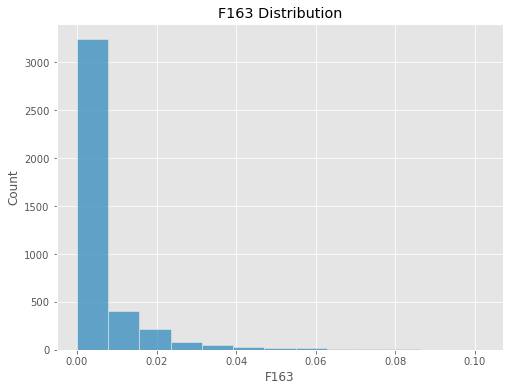

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'F163', data = experiment_df_selected)
plt.title('F163 Distribution')
plt.show()

F163 distribution is very similar to F122 distribution (although both are heavily skewed). This time, the trend in F163 is that the count decreases as the value increases with over 3000 data having value = 0.0

#### Visualizing relations between independent variables

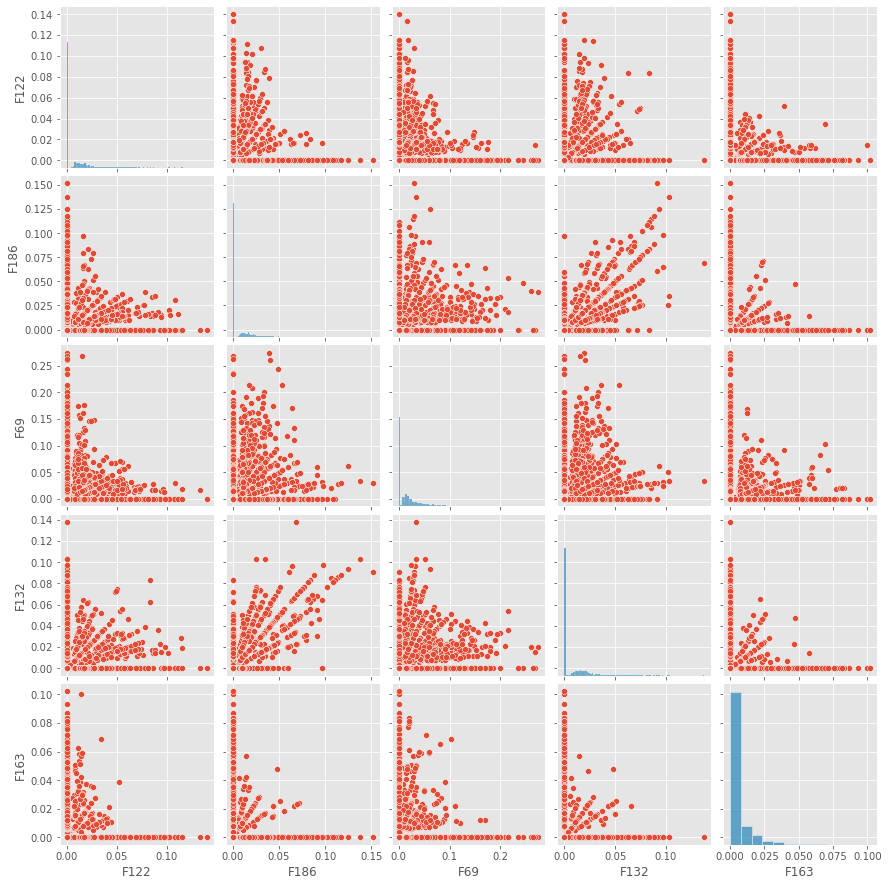

In [24]:
# Masukkan data independent variable ke pairplot
sns.pairplot(data = experiment_df_selected.loc[:,experiment_df_selected.columns != 'Class'])
plt.show()

As we can see from the graph above, every relation of independent variables are very similar to each other where the data are not evenly distributed

We have already visualized the distribution of Class variable earlier, so we will move on to visualizing relations between independent and dependent variables

#### Visualizing correlation between independent variables and Class variable

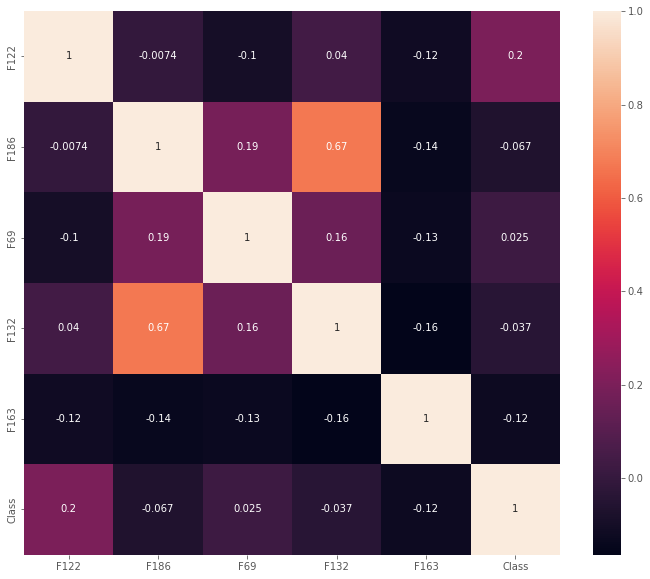

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(experiment_df_selected.corr(), annot=True)
plt.show()

The correlation is stronger as it gets closer to 1 or -1

From the correlation matrix above, we can see that F122 and F69 have a __positive correlation__ with Class while F186, F132, and F163 have a __negative correlation__ with Class

F186, F69, and F132 have a __weak correlation__ with Class as their correlation is between -0.1 and 0.1 (very close to 0.0)

While F122 and F163 have a __fairly strong correlation__ with Class as their correlation is above 0.1 (for F122) and below -0.1 (for F163)

F122 has the __highest correlation__ with 0.2 while F69 has the __lowest correlation__ with 0.025

##  Build Machine Learning Models

In this case, we need to build machine learning models that can do __multi-class classification__ (because Class variable has 5 different values)

There are many popular algorithms for multi-class classification such as KNN and Decision Trees. But interestingly, we can also use some of binary classification algorithms to do multi-class classification such as Logistic Regression and Support Vector Machine

So, for this question, I will take one of each (1 multi-class classification algorithm, 1 binary classification algorithm transformed to do multi-class classification) to compare both approach

__I chose Decision Tree and Logistic Regression__

I choose decision tree as it is simple and easy to understand. It also usually performs well. I also want to choose something new as I have used KNN for previous questions in this exam

I choose logistic regression because it is efficient to train and easier to implement when it needs to be transformed into multi-class classification problems. It also usually yields great accuracy

#### Import libraries for models

In [26]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression

### Build Decision Tree Model

In [27]:
# Fitting Classifier to the Training Set
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Build Logistic Regression Model

In [28]:
# Logistic Regression memiliki default parameter multi_class = "auto" sehingga sudah otomatis dapat menyesuaikan
#... dengan multiclass classification
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

### Predict using both models

In [29]:
dt_y_pred = dt_clf.predict(X_test) #Predict using decision tree
print(dt_y_pred)
lr_y_pred = lr_clf.predict(X_test) #Predict using logistic regression
print(lr_y_pred)

[4 3 2 ... 3 4 4]
[4 4 2 ... 4 2 2]


## Evaluate and Compare Both Models

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Evaluate Decision Tree Model

In [31]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy: {:.2f}".format(dt_accuracy))

dt_cm = confusion_matrix(y_test, dt_y_pred)
print('\nDecision Tree Confusion Matrix: \n', dt_cm)
print(classification_report(y_test, dt_y_pred))

Decision Tree Accuracy: 0.48

Decision Tree Confusion Matrix: 
 [[175   2  68  19  21]
 [  4 120 111  34   2]
 [  3  59 127  64   2]
 [  6  13  42 179   4]
 [ 40   7 142  64  39]]
              precision    recall  f1-score   support

           1       0.77      0.61      0.68       285
           2       0.60      0.44      0.51       271
           3       0.26      0.50      0.34       255
           4       0.50      0.73      0.59       244
           5       0.57      0.13      0.22       292

    accuracy                           0.48      1347
   macro avg       0.54      0.48      0.47      1347
weighted avg       0.55      0.48      0.47      1347



The Decision Tree model is only able to reach an accuracy of 48%. From the classification report, it seems that the model is having troubles with class '3' and '5' as it reaches lowest scores in both of these classes

### Evaluate Logistic Regression Model

In [32]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy: {:.2f}".format(lr_accuracy))

lr_cm = confusion_matrix(y_test, lr_y_pred)
print('\nLogistic Regression Confusion Matrix: \n', lr_cm)
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.37

Logistic Regression Confusion Matrix: 
 [[140   0  21 124   0]
 [  5  79  74 113   0]
 [  2  38  67 148   0]
 [  3   4  24 213   0]
 [ 51   2  74 165   0]]
              precision    recall  f1-score   support

           1       0.70      0.49      0.58       285
           2       0.64      0.29      0.40       271
           3       0.26      0.26      0.26       255
           4       0.28      0.87      0.42       244
           5       0.00      0.00      0.00       292

    accuracy                           0.37      1347
   macro avg       0.38      0.38      0.33      1347
weighted avg       0.38      0.37      0.33      1347



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report above, logistic regression performed poorly as it only reachers an accuracy of 37%. It seems that this model failed to predict a single data belonging to class '5' and had the biggest struggle in class '3', similar to the Decision Tree model

### Compare

From the evaluation results, the Decision Tree model came out on top by having a better accuracy than the Logistic Regression model with a margin of 11%. It seems like a multi-class classification algorithm performs better in this dataset than a binary class classification algorithm turned to a multi-class classification

Despite this, both model performed fairly poorly, failing to reach even 50% of accuracy. Perhaps a fine-tuning of both models can yield better accuracy and reach 50% but I doubt it will be able to reach 60% even after fine-tuning